# Breast cancer wisconsin


In [1]:
#Bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
from sklearn.preprocessing import StandardScaler

from Perceptron import Perceptron
from sklearn.decomposition import PCA


#### Carregamento de dados

benigno = 2 maligno = 4 

In [2]:
column_names = [
    'id', 'clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 
    'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 
    'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'
]
# Carregar o dataset e atribuir os nomes às colunas
data = pd.read_csv('breast-cancer-wisconsin.csv', header=None, names=column_names)

data

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


Verificação do tipo de dados e remover a coluna de index

In [3]:
# Remover a coluna de ID
data.drop(columns=['id'], inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   clump_thickness              699 non-null    int64 
 1   uniformity_of_cell_size      699 non-null    int64 
 2   uniformity_of_cell_shape     699 non-null    int64 
 3   marginal_adhesion            699 non-null    int64 
 4   single_epithelial_cell_size  699 non-null    int64 
 5   bare_nuclei                  699 non-null    object
 6   bland_chromatin              699 non-null    int64 
 7   normal_nucleoli              699 non-null    int64 
 8   mitoses                      699 non-null    int64 
 9   class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


Modificar para ser tipo inteiro e verificar se tem dados faltantes

In [4]:
# Substituir os valores faltando por NaN e depois preencher com a mediana
data['bare_nuclei'] = pd.to_numeric(data['bare_nuclei'], errors='coerce')
data.isnull().sum()


clump_thickness                 0
uniformity_of_cell_size         0
uniformity_of_cell_shape        0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64

Trocar os dados faltantes pela mediana e classificar benigno como 0 e maligno como 1

In [5]:
data['bare_nuclei'] = data['bare_nuclei'].fillna(data['bare_nuclei'].median())


# Substituir os valores de classe 2 e 4 para 0 e 1 (binário)
data['class'] = data['class'].replace({2: 0, 4: 1})

In [6]:
data

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,0
695,2,1,1,1,2,1.0,1,1,1,0
696,5,10,10,3,7,3.0,8,10,2,1
697,4,8,6,4,3,4.0,10,6,1,1


In [7]:
# Separar as features (X) e o alvo (y)
X = data.iloc[:, :-1].values  # Todas as colunas exceto a última
y = data.iloc[:, -1].values   # Última coluna (class)

Separar em 70% treino e 30% teste e normalizar os dados

In [8]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Aplicando o PCA para diminuir as dimensões para 2

In [9]:
# Aplicar PCA
pca = PCA(n_components=2)  # Reduzir para 2 componentes principais
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#### Treinamento e teste do modelo

In [10]:

# Treinar o modelo Perceptron com os dados transformados
perceptron = Perceptron(0.01, 5000)
perceptron.fit(X_train_pca, y_train)

# Fazer previsões no conjunto de teste
y_pred_test = perceptron.predict(X_test_pca)

Verificação das metricas como acuracia, precisao, recall, f1-score e matriz de confusão

In [11]:
# Avaliar a performance do Perceptron
acc = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Exibir os resultados
print(f"Acurácia: {acc}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

print(f"Matriz de Confusão:\n{conf_matrix}")


Acurácia: 0.9666666666666667
Precisão: 0.9545454545454546
Recall: 0.9402985074626866
F1-Score: 0.9473684210526315
Matriz de Confusão:
[[140   3]
 [  4  63]]


Visualização da superficie de decisao após usar o PCA

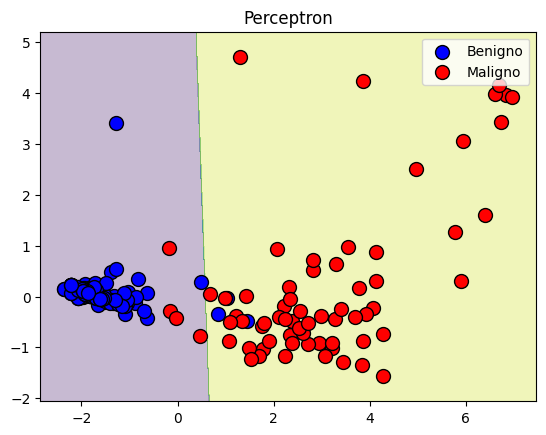

In [12]:
# EXTRA: Visualizar a superfície de decisão

# Função para plotar a superfície de decisão
def plot_decision(X, y, model):
        # Determina os limites para as dimensões dos dados
        x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5  
        x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5 
        
        # Para desenhar a superfície de decisão, cria uma grade de pontos que cobre toda a área de interesse.
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),  
                                np.arange(x2_min, x2_max, 0.01))  

        # Após criar a grade, o modelo Perceptron prevê a classe de cada ponto na grade.
        grid = np.c_[xx1.ravel(), xx2.ravel()] 

        Z = model.predict(grid)  
        Z = Z.reshape(xx1.shape)  
        
        # Plota a superfície de decisão como um contorno preenchido
        plt.contourf(xx1, xx2, Z, alpha=0.3)
        
        # Plota os dados de teste, colorindo os pontos de acordo com suas classes
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], 
                        color='blue', edgecolors='k', marker='o', s=100, label='Benigno')  # Pontos da classe Salmão
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], 
                        color='red', edgecolors='k', marker='o', s=100, label='Maligno')  # Pontos da classe Robalo
        
        plt.legend() 
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        plt.title('Perceptron')
        plt.show()

# Plotar a superfície de decisão chamando a função plot_decision
plot_decision(X_test_pca, y_test, perceptron)
